## Loading library

*Tensor Flow* library is a requirement to Keras. To install it do: `pip3 install tensorflow`.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.5.0'

## Loading dataset using Pandas

In [4]:
import pandas as pd

In [7]:
data_train_file = 'data/fashion-mnist_train.csv'
data_test_file = 'data/fashion-mnist_test.csv'

# this method returns a pandas DataFrame object "pandas.core.frame.DataFrame"
data_train = pd.read_csv(data_train_file)
data_test = pd.read_csv(data_test_file)

print(data_train.shape)
data_train.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Treating data

In [8]:
# This function slices a panda data frame into two arrays. The first with labels and the other with
# all samples and their features - one by line. 
def treat_raw_data_frame(data_frame):
    # data is normalized to the max valua a pixel can take (255) - Gray Scale
    # each sample is a 28x28 array serialized
    features = data_frame.values[:, 1:]/255

    labels = data_frame.label.values

    # transforming labels to "one-hot" format
    labels = tf.keras.utils.to_categorical(labels)
    return labels, features

train_labels, train_features = treat_raw_data_frame(data_train)
test_labels, test_features = treat_raw_data_frame(data_test)

print("Shape of trainning feature dataset: {}".format(train_features.shape))
print("Shape of trainning labels dataset: {}".format(train_labels.shape))

Shape of trainning feature dataset: (60000, 784)
Shape of trainning labels dataset: (60000, 10)


In [9]:
train_features[0, 90:110]

array([0.        , 0.        , 0.        , 0.        , 0.24313725,
       0.23921569, 0.08235294, 0.11372549, 0.09019608, 0.2       ,
       0.53333333, 0.23921569, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

## Visualizing samples using matplotlib

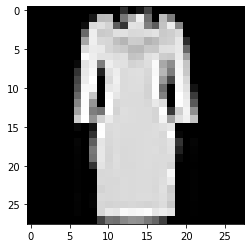

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# This functions plots a sample rechape array into a 28x28 2 dimensional array
def plot(data_set, index):
    plt.figure()
    plt.imshow(np.reshape(data_set[index, :], (28,28)), "gray")

plot(train_features, 4)

## Designing the Model

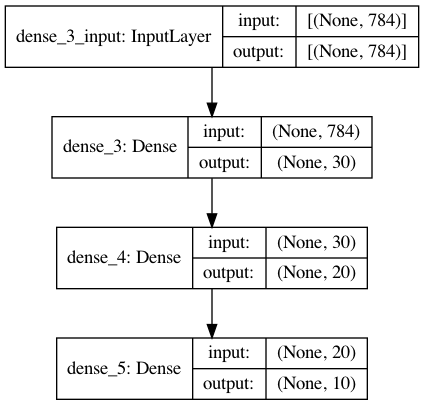

In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Define a sequential model. This defines the way Keras will generate a model. Keras has three different
# type of models: sequential, functional and subclassing [3].
model = tf.keras.Sequential()

# Two hidden layers, activation function is rectified linear unit
# all activation functions can be found at [4]
model.add(tf.keras.layers.Dense(30, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))

# Output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Keras provides resource for plotting the Neural Network architecture and parameters.
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

## References

1. https://www.tensorflow.org/guide/keras
1. https://www.kaggle.com/zalando-research/fashionmnist
1. https://keras.io/api/models/
1. https://keras.io/api/layers/activations/